## Analyse Grundstückfläche / Geschossfläche

In [1]:
from typing import Final

import seaborn as sns
import src.package.importer as im
import src.package.consts as c
import src.package.charts as charts
import src.package.importer_usages as imp_usg

FIELD: Final = c.FIELD_AREA_PROPERTY
FIELD_RATIO: Final = c.FIELD_GSF_GF_RATIO
LABEL: Final = charts.LABEL_GSF
LABEL_RATIO: Final = charts.LABEL_RATIO_GSF_GF

charts.set_preferences(sns, font_scale=2)

df = im.get_extended_dataset('../../package/datasets/full_dataset.csv', cluster_threshold=10, hnf_gf_ratio=False)
df = im.calculate_gf_ratio(df, other_field=FIELD, ratio_field=FIELD_RATIO)
df, usages = imp_usg.extract_usage_details(df)
filtered_df = im.select_relevant_features(df, additional_features=[FIELD])

df = im.cap_upper_gf_field(df, upper_percentile='90%', field=FIELD)

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


### Allgemein

In [2]:
filtered_df[FIELD].describe()

count    7.580000e+02
mean     1.162956e+04
std      5.361523e+04
min      1.000000e+00
25%      2.129750e+03
50%      5.161500e+03
75%      1.006850e+04
max      1.070000e+06
Name: area_total, dtype: float64

In [3]:
filtered_df[c.FIELD_AREA_TOTAL_FLOOR_416].describe()

count      894.000000
mean      6384.539150
std       8584.172628
min         50.000000
25%       1423.250000
50%       3420.500000
75%       7695.000000
max      75328.000000
Name: area_total_floor_416, dtype: float64

### Visualisierungen
Zeigt **Grundstückfläche** in relation zur **Geschossfläche**.

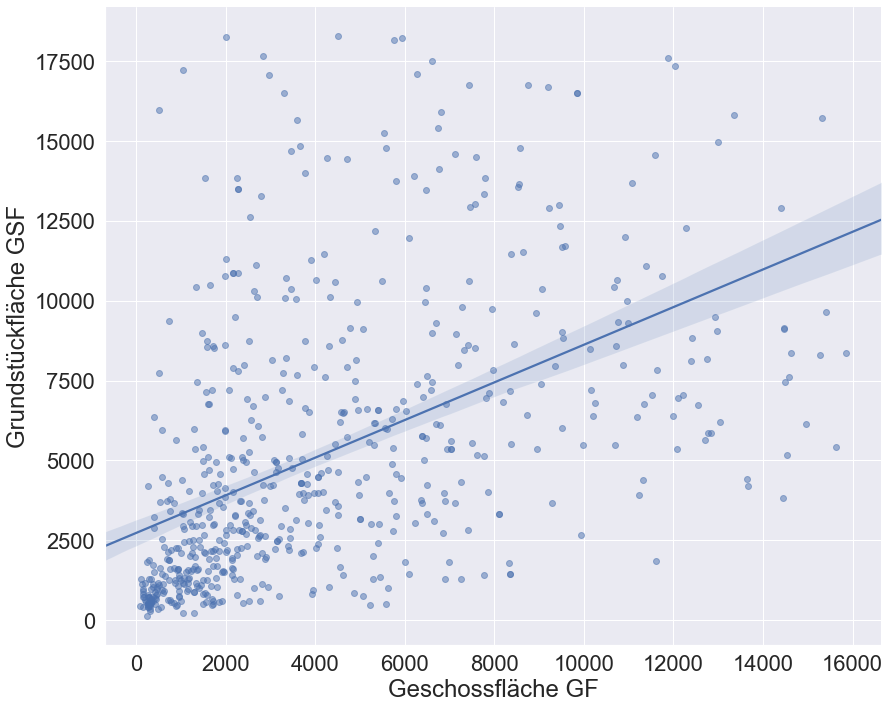

In [4]:
charts.lmplot_gf_field(df, field=FIELD, field_label=LABEL)

<AxesSubplot:xlabel='Geschossfläche GF', ylabel='Grundstückfläche GSF'>

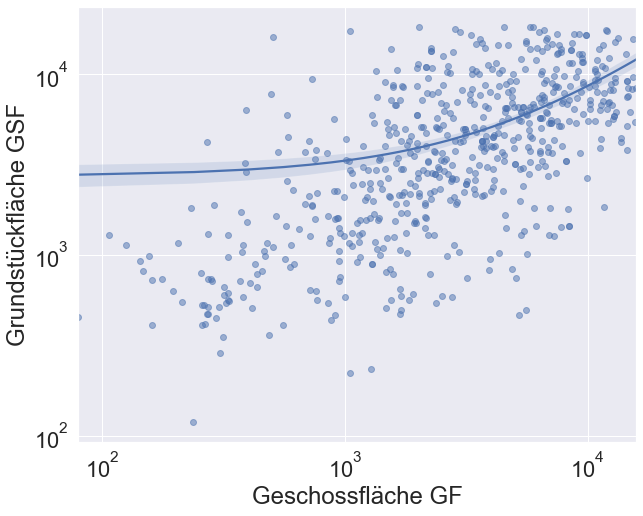

In [5]:
charts.regplot_gf_field(df, field=FIELD, field_label=LABEL, logscale=True)

#### 75% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


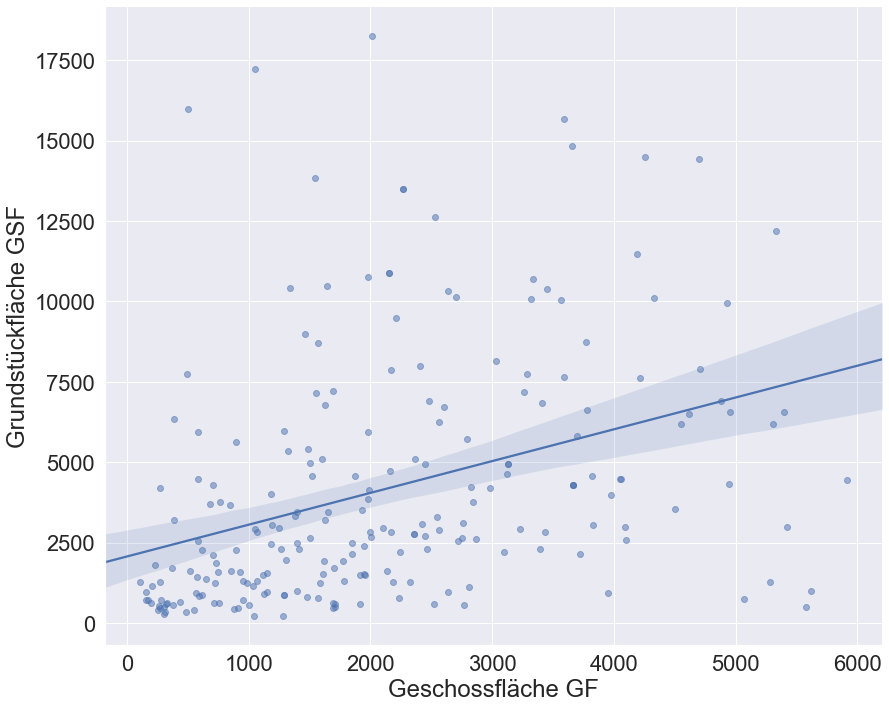

In [6]:
df_75_percentile = im.cap_upper_gf_field(df)
charts.lmplot_gf_field(df_75_percentile, field=FIELD, field_label=LABEL, ratio_label=FIELD_RATIO, percentile='75')

#### 25% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


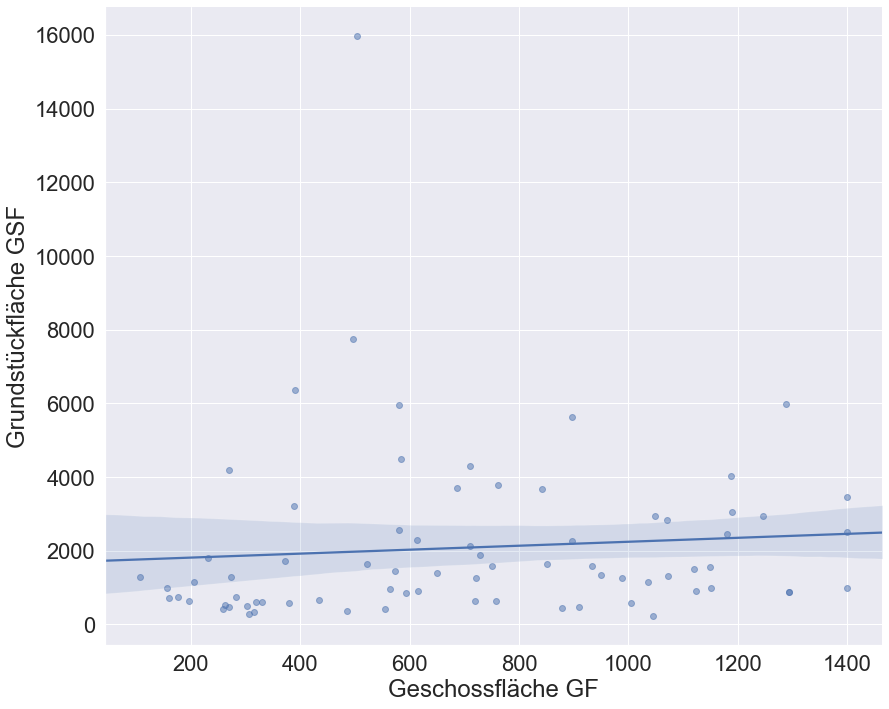

In [7]:
df_25_percentile = im.cap_upper_gf_field(df, upper_percentile='25%')
charts.lmplot_gf_field(df_25_percentile, field=FIELD, field_label=LABEL, ratio_label=FIELD_RATIO, percentile='25')

### Nach Kategorie
Ausgenommen: TECHNIK, GESUNDHEIT, OFFENE_BAUTEN

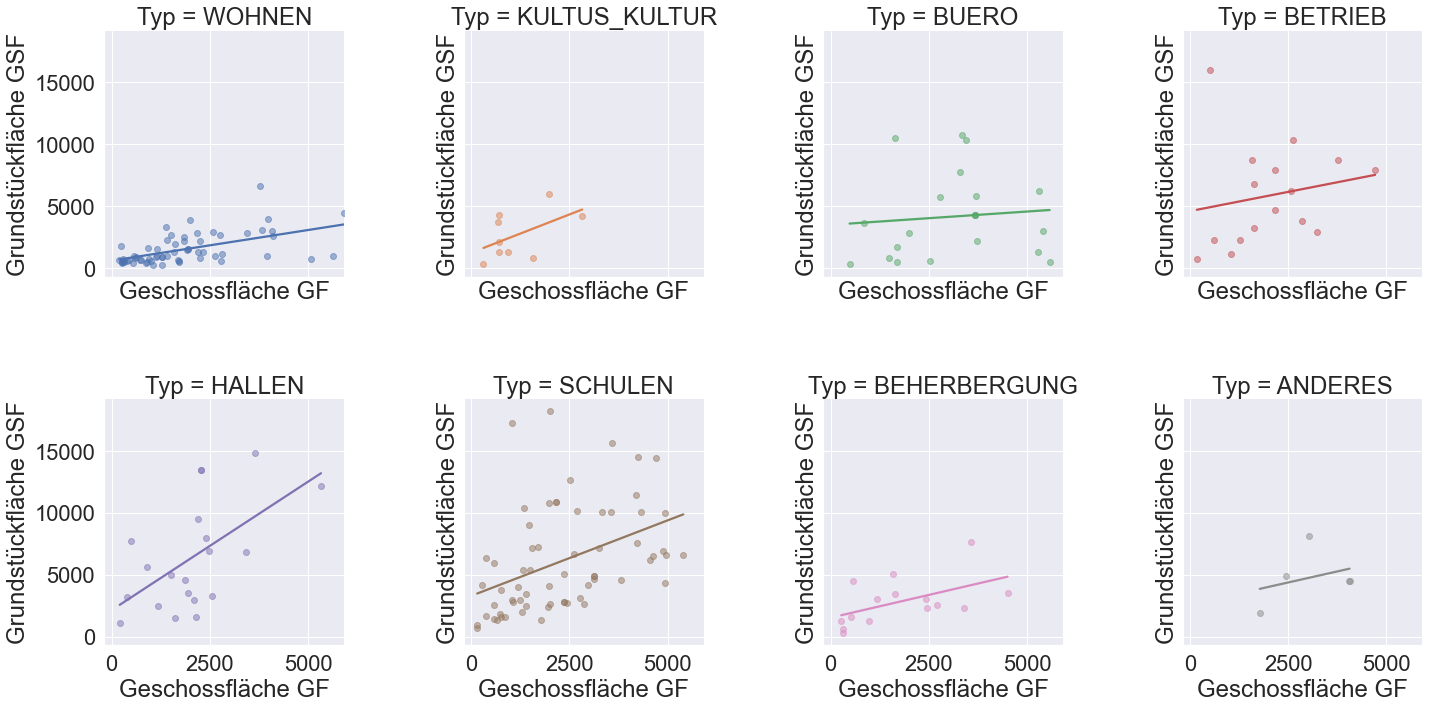

In [8]:
clusters_to_remove = ["TECHNIK", "GESUNDHEIT", "OFFENE_BAUTEN"]
df_75_percentile.drop(df_75_percentile[df_75_percentile[c.FIELD_USAGE_CLUSTER].isin(clusters_to_remove)].index,
                      inplace=True)

charts.lmplot_clustered(df_75_percentile, y=FIELD, y_label=LABEL, ratio_label=FIELD_RATIO,
                        save_label=f'{FIELD_RATIO}_75percentile')

### Beschreibung

In [9]:
charts.describe_ratios(df, ratio_field=FIELD_RATIO)

,count,mean,std,min,25%,40%,50%,75%,max
usage_cluster,,,,,,,,,
ANDERES,9.0,2.674365,2.497687,1.087788,1.104356,1.688716,1.998137,2.686223,8.984127
BEHERBERGUNG,49.0,1.628930,1.374064,0.208841,0.791389,1.085677,1.256834,1.913826,7.678082
BETRIEB,48.0,2.893335,4.515731,0.475541,1.149766,1.451953,1.952145,2.830637,31.706349
BUERO,61.0,1.101160,1.152835,0.088562,0.442881,0.571429,0.783827,1.167893,6.389024
GESUNDHEIT,15.0,1.463533,1.096010,0.442889,0.615966,1.085805,1.251744,1.848454,4.635093
HALLEN,55.0,2.911667,2.490161,0.613167,1.181708,1.814752,2.254039,4.116335,15.604839
KULTUS_KULTUR,22.0,2.069068,1.516368,0.214526,1.178447,1.422489,1.492534,2.714821,6.043662
SCHULEN,126.0,2.990723,2.922298,0.355546,1.285941,1.594393,2.080452,3.715767,16.408571
WOHNEN,230.0,1.156352,0.895580,0.089118,0.630285,0.792176,0.907033,1.521527,7.801724


### Violinplot
Zeigt Ratios verschiedener Cluster inkl. Verteilung.<br>
Unterteilung in umgekehrte Perzentile (also Grösser als).<br>

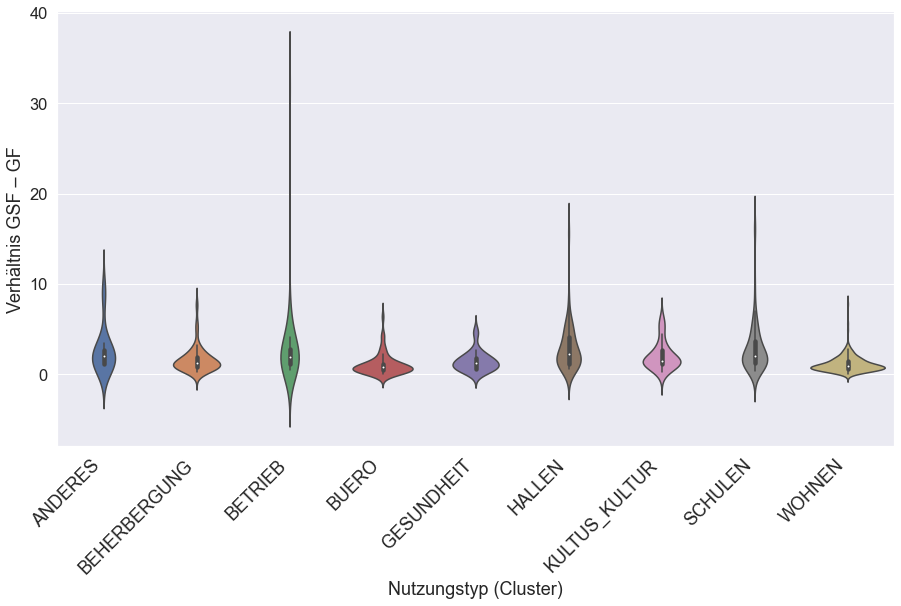

In [10]:
charts.set_preferences(sns, rc=[15, 8], font_scale=1.5)
charts.violinplot_ratios(df, ratio_field=FIELD_RATIO, ratio_label=LABEL_RATIO, cut=3,
                         garage_hue=False)

## Benchmarks
Benchmarks zu den Ratio – nach Cluster.<br>

Ratios sind in **30%** der Fälle grösser als x

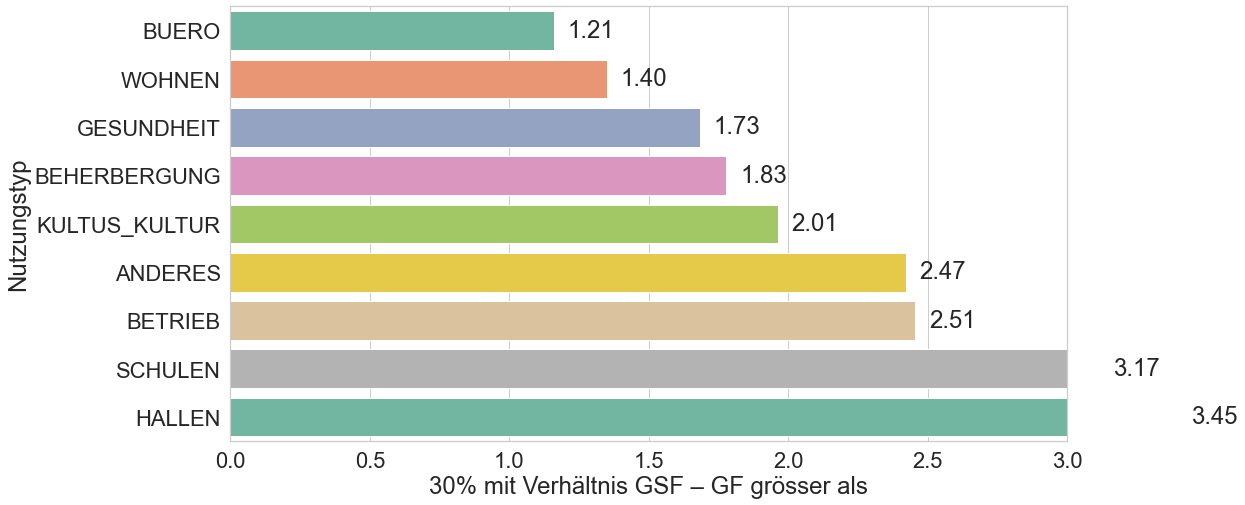

In [11]:
charts.set_preferences(sns, font_scale=2)

lower = 0.0
upper = 3.0

ratio_data = df[FIELD_RATIO]
charts.barplot_reversed_percentiles(ratio_data, df, ratio_field=FIELD_RATIO, ratio_label=LABEL_RATIO, percentile=70, upper_limit=upper,
                                    lower_limit=lower)

Ratios sind in **60%** der Fälle grösser als x

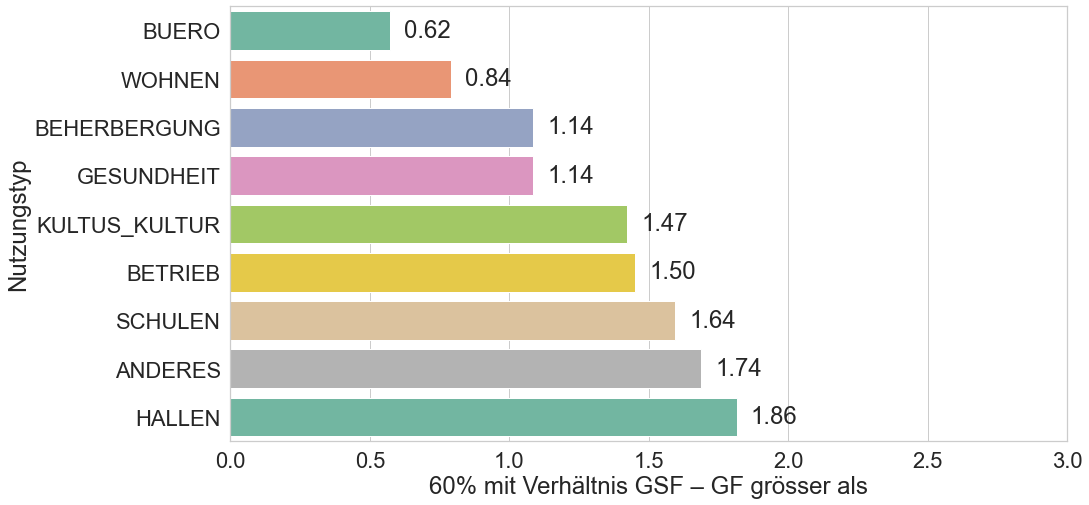

In [12]:
charts.barplot_reversed_percentiles(ratio_data, df, ratio_field=FIELD_RATIO, ratio_label=LABEL_RATIO, percentile=40, upper_limit=upper,
                                    lower_limit=lower)

Ratios sind in **70%** der Fälle grösser als x

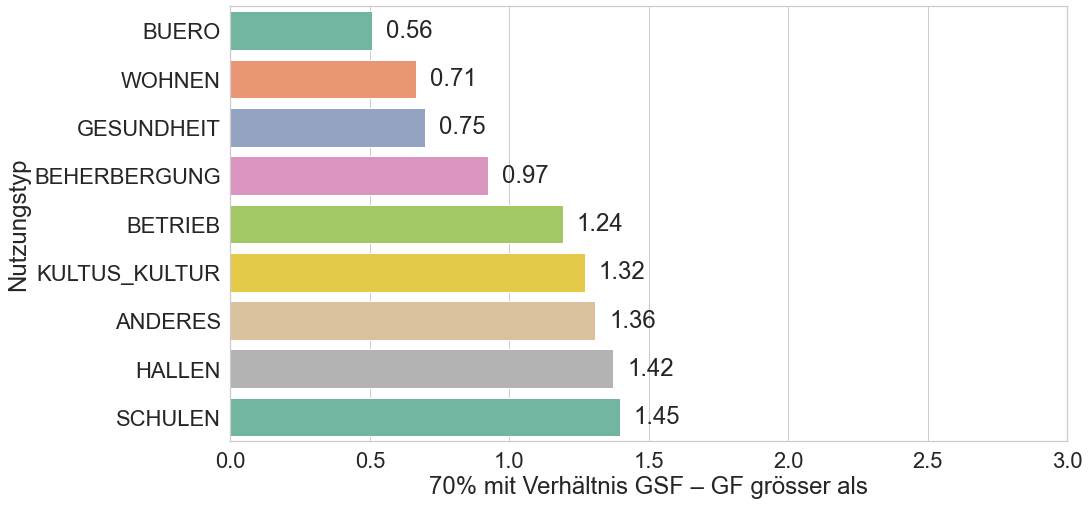

In [13]:
charts.barplot_reversed_percentiles(ratio_data, df, ratio_field=FIELD_RATIO, ratio_label=LABEL_RATIO, percentile=30, upper_limit=upper,
                                    lower_limit=lower)